In [4]:
%%bash
NAME="Lecture 2 - Control Flow With Bit"
ORDER='2'
TITLE=$NAME
MDXFILE="lecture$ORDER.mdx"

PAGES='../../website/src/pages'
FOLDER='lectures'

# The following is template code and can be reused across notebooks

jupyter nbconvert "$NAME.ipynb" \
  --Exporter.preprocessors jupybeans.RemoveSkip \
  --to html \
&& cp "$NAME.html" $PAGES/$FOLDER/ \
&& cat > $PAGES/$FOLDER/$MDXFILE << EOF 
---
order: $ORDER
title: $TITLE
---
import stuff from './$NAME.html'
import InlineHtml from '../../components/helpers'

<InlineHtml src={stuff} />

EOF

[NbConvertApp] Converting notebook Lecture 2 - Control Flow With Bit.ipynb to html
[NbConvertApp] Writing 762422 bytes to Lecture 2 - Control Flow With Bit.html


## Control Flow With Bit

## Today's big ideas
- loops
- `if`
- `==`
- make a drawing
- `left_clear()`
- puzzles

## Legos and Language

When you're building with Legos, each individual brick is not terribly useful on its own, but once we have enough bricks of different types, we can build some pretty cool stuff. 

When you're learning a new language, sometimes you run into situations where you struggle to express yourself because you don't know enough words. But as your vocabulary and mastery of the grammar grow, your ability to express yourself becomes more fluent and comfortable.

Today we'll be presenting more Lego bricks and vocabulary. Each idea by itself is simple, but as you learn to put them together, you'll do some pretty cool stuff.

## Do you remember...Go Green

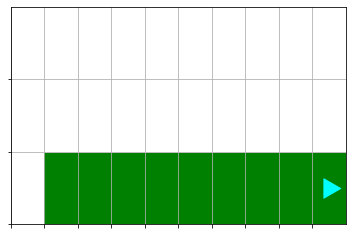

In [4]:
from byubit import Bit

bit = Bit.new_world(10,3)
while bit.front_clear():
    bit.move()
    bit.paint("green")
bit.draw()

The `while` body looks like this:

```python
bit.move()
bit.paint("green")
```

That works fine. It paints all the squares but the first one.

We could also have written it this way:

```python
bit.paint("green")
bit.move()
```

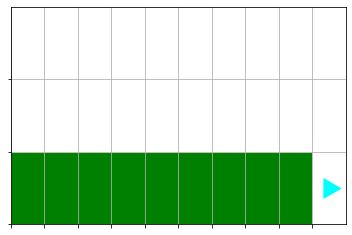

In [3]:
bit = Bit.new_world(10,3)
while bit.front_clear():
    bit.paint("green")
    bit.move()
bit.draw()

That works fine too!

It paints all the squares except the last one.

Loops will very often miss one square - you can decide whether you want to miss the first square or the last square.

This is OK. Don't go crazy trying to get all the squares in one loop. Just add a line before or after the loop.

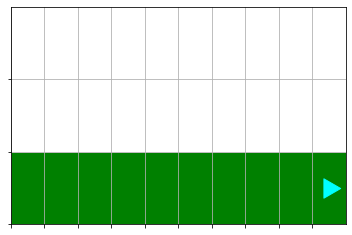

In [4]:
bit = Bit.new_world(10,3)

# Paint the current square
bit.paint("green")

# Paint the rest
while bit.front_clear():
    bit.move()
    bit.paint("green")
bit.draw()

## Looping Intuition

The decision and the action.

Does this make sense to everyone?

## Lines *before*, *in*, and *after* a loop

```python
bit = Bit.new_world(10,3)

# Paint the current square
bit.paint("green")

# Paint the rest
while bit.front_clear():
    bit.move()
    bit.paint("green")
bit.draw()
```

There are lines before the loop. They run once.

The lines in the loop run many (or no) times. It's flexible.

The lines after the loop run once. 

How does the computer know which lines belong to the loop and which lines don't?

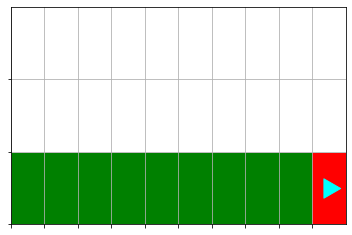

In [5]:
bit = Bit.new_world(10,3)

# Paint the current square
bit.paint("green")

# Paint the rest
while bit.front_clear():
    bit.move()
    bit.paint("green")

bit.paint("red")
bit.draw()

What happens if we indent `bit.paint("red")`?

## No Go

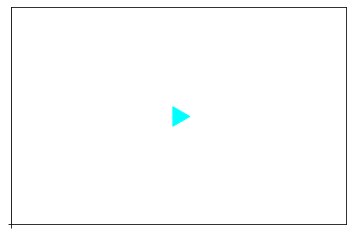

In [64]:
bit = Bit.new_world(1,1)  # Not a very big space to live in...
while bit.front_clear():
    bit.move()
    bit.paint("green")

bit.draw()

How many times does the loop body run?

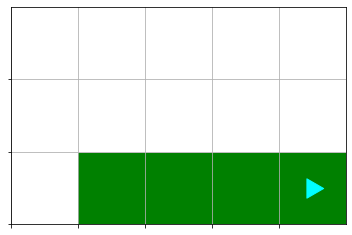

In [7]:
bit = Bit.new_world(5,3)
while bit.front_clear():
    bit.move()
    bit.paint("green")

bit.draw()

How manuy times does the loop body run?

Same loop code, different scenarios -> **Generality**

## Generality

When you pull into the gas station, you have to find the pump specific for your car's make and model. 

<div class='big centered'> 🚗 </div>

When you bake a pie, you have to put the pie in the pie-baking oven, not the break-baking oven. 

<div class='big centered'> 🥧 </div>


NO! 

**Generality** is the concept that I can build one thing that will work for many use-cases. 

It doesn't have to work for ALL use-cases, but it probably isn't useful if it only works in one case.

Usually, we like generalized code. One script works for many scenarios. 

When you try to make your code cover too many scenarios...that's silly. 

Usually you'll have a good feel for the kinds of cases you are trying to solve at the same time, and which cases need a new solution. Like gas pump vs EV charging station.

## `while True`

Recall that a `while` loop needs an expression that evaluates to `True` or `False`.

If the condition is `True`, then the loop body will run.

If the condition is `False`, the loop body won't run.

After each execution of the loop, we test the condition again. 

What happens if the condition **never** changes?

Is that good or bad?

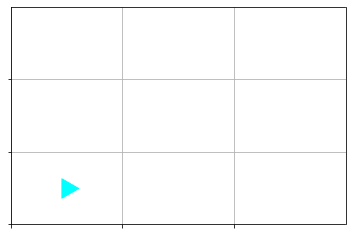

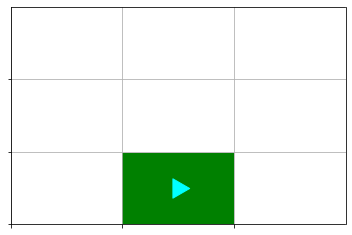

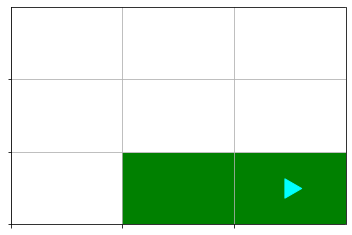

MoveOutOfBoundsException: Bit tried to move to [3 0], but that is out of bounds

In [65]:
bit = Bit.new_world(3,3)
while True:
    bit.draw()
    bit.move()
    bit.paint("green")
bit.draw()

## Spin!

In [2]:
bit = Bit.new_world(3,3)
while True:
    bit.left()

Exception: Bit has done too many things. Is he stuck in an infinite loop?

## A Note on Calling Functions

Python requires `()` for a function call to happen. But it is technically valid syntax to leave the `()` off, but the meaning becomes different.

### `bit.move()` 
*You*: "Hey computer, move the `bit`." 

*Computer*: "OK"

### `bit.move` 
*You*: "Hey computer, did you know `bit` has an action called `move`?" 

*Computer*: "Yes. I was aware of that."

In [66]:
bit = Bit.new_world(5,3)
while bit.front_clear():
        bit.move
        bit.paint('blue')

Exception: Bit has done too many things. Is he stuck in an infinite loop?

## `if`

`while` loops are great when you want to do the same thing repeatedly.

What if you want to control whether it happens only once?

What if you want to paint a square green **if** it is blue, but you want to paint it blue if it is something **else**?

In [7]:
%%file blue-to-green.txt
-rb-brb-b-brb
0 0
0

Overwriting blue-to-green.txt


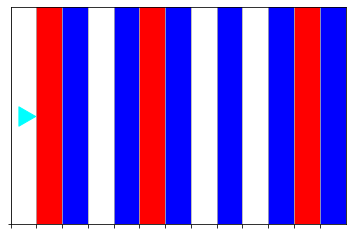

In [8]:
bit = Bit.load("blue-to-green.txt")
bit.draw()

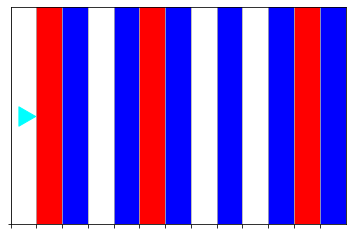

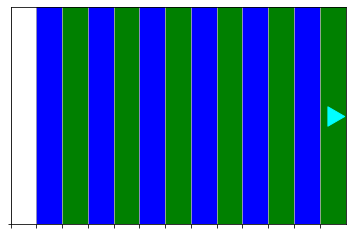

In [9]:
bit = Bit.load("blue-to-green.txt")
bit.draw()

# Paint green if blue, paint blue for anything else
while bit.front_clear():
    bit.move()
    if bit.get_color() == "blue":
        bit.paint("green")
    else:
        bit.paint("blue")
bit.draw()

<div class='big centered'> 👏🏽 </div>

That was cool. Let's dig in.

## `if` syntax
```
if <condition>:
    Do this if <condition> is True
else:
    Do this if <condition> is False
```

Also valid:
```
if <condition>:
    Do this if <condition> is True
```

Again, indentation matters.

`bit.get_color()` returns the color of the square `bit` is currently sitting on.

In [15]:
bit = bit.new_world(1,1)
print(bit.get_color())

bit.paint("blue")
print(bit.get_color())

bit.erase()
print(bit.get_color())

None
blue
None


`None` has a special meaning in python. It's a way of saying "nothing". You'll see it used more as we go along.

## Revisiting expressions

In [21]:
print(2)

2


In [20]:
print(1 + 1)

2


In [19]:
print(1 + 2 + 3 - 4)

2


In these expressions, I'm essentially telling the computer:

"Take these symbols, do the work they represent, and bring the result back to me."

```python
print(1 + 2 + 3 - 4)
```
becomes
```python
print(2)
```

In python, the name of the function (e.g. `bit.get_color`) represents some series of work, just like `+` represents the work of addition.

When you call a function (e.g. `bit.get_color()`), you're telling the computer:

"Do the work that `bit.get_color` represents, then bring the result back to me." 

When a function has nothing to return, it returns `None`. 

In [23]:
print(bit.left())

None


So, what does `print` return? How could we find out?

## Comparing values

```python
while bit.front_clear():
    bit.move()
    if bit.get_color() == "blue":
        bit.paint("green")
    else:
        bit.paint("blue")
```

When we want to compare two values—i.e. we want to ask "are these the same?"—we use `==`.

Yes, there are two `=` in `==`. 

In [30]:
print("blue" == "blue")

True


In [29]:
print("blue" == "red")

False


In [26]:
print(None == "blue")

False


What about asking "are these different?"

Use `!=`

In [32]:
print("blue" != "red")

True


In [31]:
print("blue" != "blue")

False


## `==` and `!=` in action!

```python
if bit.get_color() == "green":
    # Run this if the current color is green
...

if bit.get_color() == None:
    # Run this if there is no color at the current square
    
...

if bit.get_color() != "red":
    # Run this if the color isn't red (i.e. the color is None, "green", or "blue")
```

## Our Bag of Bricks
 
We now have a growing bag of Lego bricks
- `move`, `left`, `right`
- `paint`
- `front_clear`
- `get_color`
- `==`
- `while`
- `if`

Let's put these together to build something great.

## Fix the tree

In [33]:
%%file tree-before.txt
-------------
-ggggggggggg-
---ggggggg---
-------------
-------------
-------------
-------------
-------------
------r------
kkkkkkkkkkkkk
0 1
0

Writing tree-before.txt


In [34]:
%%file tree-after.txt
-------------
-ggggggggggg-
---ggggggg---
------r------
------r------
------r------
------r------
------r------
------r------
kkkkkkkkkkkkk
6 7
1

Writing tree-after.txt


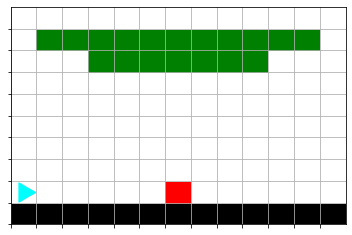

In [38]:
bit = Bit.load("tree-before.txt")
bit.draw()

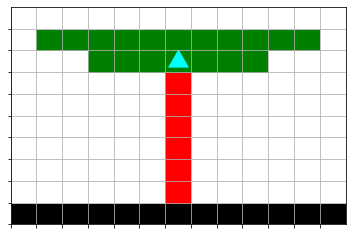

In [36]:
bit = Bit.load("tree-after.txt")
bit.draw()

When solving problems like these, don't try to do it all in your head! 

Draw pictures. 

Write it out. 

Let's break the process down.

### Start with the beginning
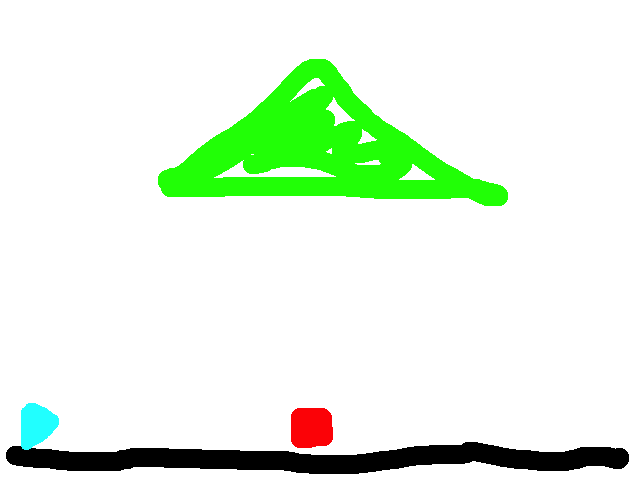

### What is the next goal—what does that look like?
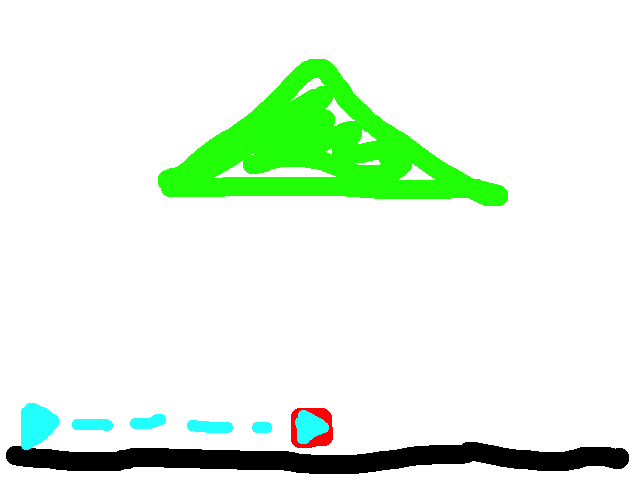

### What code can get Bit from the start to the first goal?

Q: What do we want to do?

A: Move Bit from the start to the red square.

"Move Bit until the square is red"

OR

"While the current square is not red, move the Bit"

How do we know what color the square is?

`bit.get_color()`

How do we know whether that color is not red?

`bit.get_color() != "red"`

How do we move the bit while the color is not red?

```python
while bit.get_color() != "red":
    bit.move()
```

### Let's try what we have so far

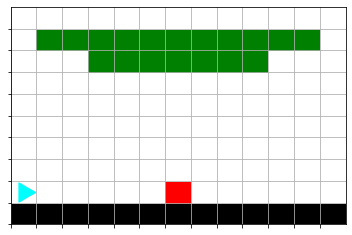

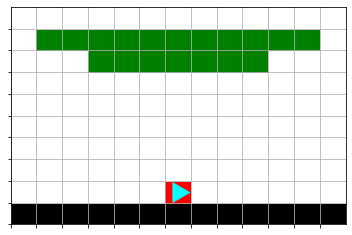

In [69]:
# Solution - write this live
bit = Bit.load("tree-before.txt")
bit.draw()
while bit.get_color() != "red":
    bit.move()
bit.draw()

In [ ]:
from byubit import Bit
bit = Bit.load("tree-before.txt")
bit.draw()

# Fill it in

bit.draw()

<div class="big centered">GO TEAM! 💪🏻 </div>

### What's the next goal?

We just moved to the red square. 

Now we want to move to the green square, but paint as we go.

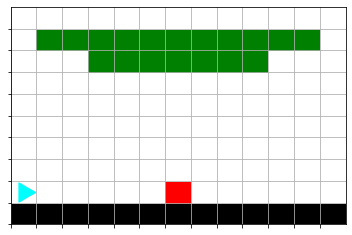

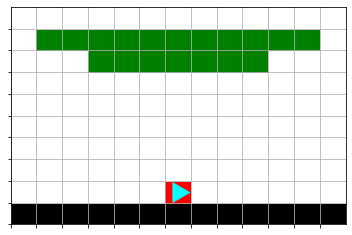

MoveOutOfBoundsException: Bit tried to move to [ 6 10], but that is out of bounds

In [42]:
# Solution attempt 1 - code live
bit = Bit.load("tree-before.txt")
bit.draw()

# Move to the red square
while bit.get_color() != "red":
    bit.move()
bit.draw()

# Move to the green square and paint
bit.left()
while bit.get_color() != 'green':
    bit.move()
    bit.paint('red')
bit.draw()

In [ ]:
bit = Bit.load("tree-before.txt")
bit.draw()

# Move to the red square
while bit.get_color() != "red":
    bit.move()
bit.draw()

# Move up to the green, painting red as we go


big.draw()

### Oops!

What happened?

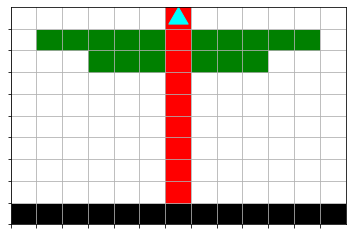

In [43]:
bit.draw()

That's not quite what we expected. 

Rather than ask: "Why didn't this work", let's ask "What sequence of steps did Bit take to get here"?

Let's look at the code:

```python
# Move to the green square and paint
bit.left()
while bit.get_color() != 'green':
    bit.move()
    bit.paint('red')
bit.draw()
```

How does the *paint red* and *`while` condition* interact?

- Am I on a green color?
  - No, I'm on a red color, so move and paint red
- Am I on a green color?
  - No, I'm on a red color, so move and paint red
- Am I on a green color?
  - No, I'm on a red color, so move and paint red
- Am I on a green color?
  - No, I'm on a red color, so move and paint red

<div class='big centered'> 🤔 </div>

### Solution

So, we're cobbering the color of the square with red before we check whether it is green.

How do we fix it?

There are several ways we could address it.

Let's say we only want to paint empty squares red. Then we'll never clobber a colored square.

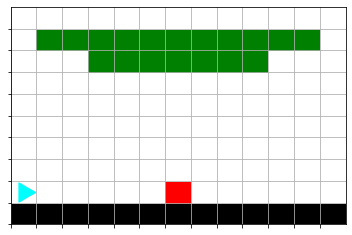

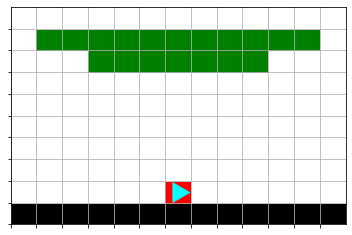

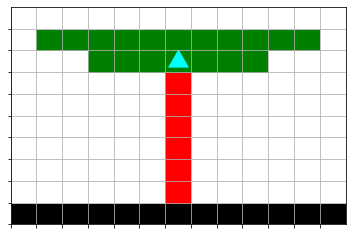

In [70]:
# Solution - code live
bit = Bit.load("tree-before.txt")
bit.draw()

# Move to the red square
while bit.get_color() != "red":
    bit.move()
bit.draw()

# Move to the green square and paint
bit.left()
while bit.get_color() != 'green':
    bit.move()
    if bit.get_color() == None:
        bit.paint('red')
bit.draw()

In [ ]:
bit = Bit.load("tree-before.txt")
bit.draw()

# Move to the red square
while bit.get_color() != "red":
    bit.move()
bit.draw()

# Move to the green square and paint
# Something isn't working right...please fix it.
bit.left()
while bit.get_color() != 'green':
    bit.move()
    bit.paint('red')
bit.draw()

#### Other solution

We could add a `bit.move()` before our second `while` block and then switch the order of `bit.move()` and `bit.paint()` in the `while` block. 

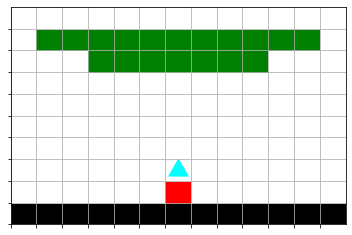

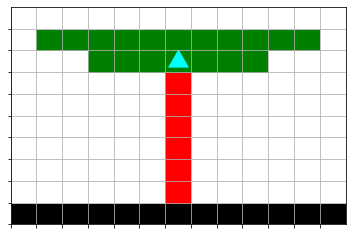

In [46]:
# Solution - code live
bit = Bit.load("tree-before.txt")

# Move to the red square
while bit.get_color() != "red":
    bit.move()

# Move to the green square and paint
bit.left()
bit.move()
bit.draw()
while bit.get_color() != 'green':
    bit.paint('red')
    bit.move()
bit.draw()

In [ ]:
bit = Bit.load("tree-before.txt")
bit.draw()

# Move to the red square
while bit.get_color() != "red":
    bit.move()
bit.draw()

# Move to the green square and paint
# Something isn't working right...please fix it.
bit.left()
while bit.get_color() != 'green':
    bit.move()
    bit.paint('red')
bit.draw()

Either solution is good. 

Each person will have an individual preference for which solution they prefer. 

That's OK!

## Thinking, Drawing, Coding

Use drawings to help yourself understand the task at hand and the current state of your code. 

This isn't a "beginner's crutch"—seasoned professionals do this too!

## More bricks for the bag

### Clear?

```python
bit.left_clear()
bit.right_clear()
```

These are like `bit.front_clear()`, but checks on the side.

### Blocked squares

Sometimes Bit will encounter blocked squares. They are colored black. 

In [48]:
%%file blocked-squares.txt
---
--k
-k-
1 1
0

Writing blocked-squares.txt


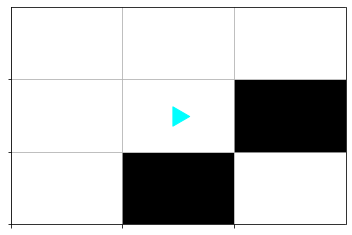

Front clear: 
False
Left clear: 
True
Right clear: 
False


In [51]:
bit = Bit.load("blocked-squares.txt")
bit.draw()

print("Front clear: ")
print(bit.front_clear())

print("Left clear: ")
print(bit.left_clear())

print("Right clear: ")
print(bit.right_clear())

In [52]:
%%file while-right-clear.txt
------
------
---kkk
----kk
0 2
0

Writing while-right-clear.txt


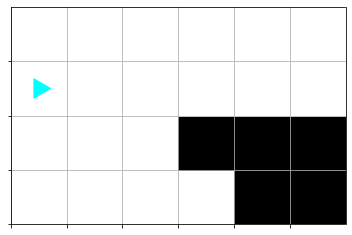

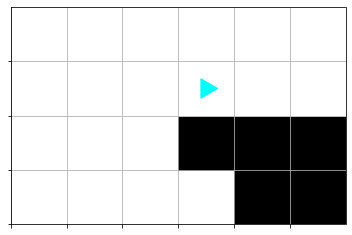

In [53]:
bit = Bit.load('while-right-clear.txt')
bit.draw()

while bit.right_clear():
    bit.move()
    
bit.draw()

### `not`

`not` in python changes a `True` to `False` and a `False` to `True`.

```python
while not bit.right_clear():
    bit.move()
```

In [54]:
print(not True)

False


## Bit Puzzles

<https://byucs110.org/resources/bit-puzzles/>

## Reverse Coyote

Remember Wiley Coyote from the old cartoon *Roadrunner*?

He's always running off of cliffs and suspends in the air for a moment before falling.

Sometimes he's able to run back to the cliff before he falls. Let's help him out.

In [55]:
%%file reverse-coyote-start.txt
------
------
---kkk
----kk
0 2
0

Writing reverse-coyote-start.txt


In [59]:
%%file reverse-coyote-finish.txt
------
gbbb--
---kkk
----kk
3 2
0

Overwriting reverse-coyote-finish.txt


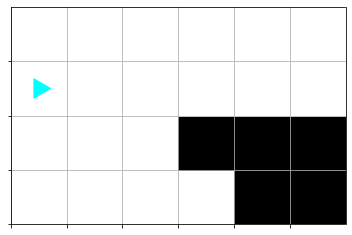

In [60]:
bit = Bit.load("reverse-coyote-start.txt")
bit.draw()

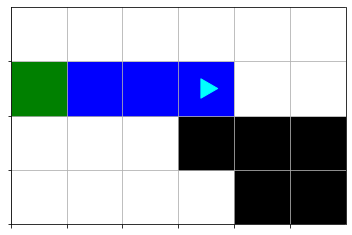

In [61]:
Bit.load("reverse-coyote-finish.txt").draw()

What is the test for this? Under what conditions do we want Bit to move?

Color at 0,2 does not match: None vs green
Color at 1,2 does not match: None vs blue
Color at 2,2 does not match: None vs blue
Color at 3,2 does not match: None vs blue
Location of Bit does not match: (0, 2) vs (3, 2)


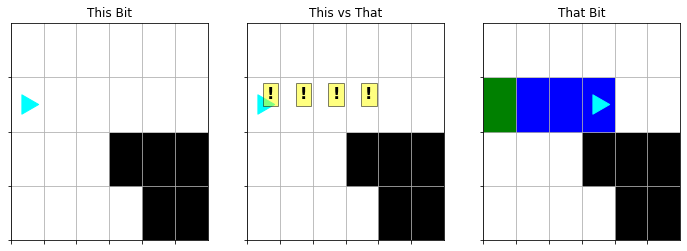

In [62]:
bit = Bit.load("reverse-coyote-start.txt")

# fill in the rest!

bit.compare(Bit.load("reverse-coyote-finish.txt"))